# Fazendo as importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from db import *

In [2]:
vgsales = get_db()
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Franquias

## The Legend of Zelda

In [3]:
zelda = vgsales[vgsales.Name.str.contains("Zelda")]
zelda.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
94,95,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4.10,1.89,1.45,0.16,7.60
100,101,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.31
127,128,The Legend of Zelda,NES,1986,Action,Nintendo,3.74,0.93,1.69,0.14,6.51
186,187,The Legend of Zelda: Phantom Hourglass,DS,2007,Action,Nintendo,1.90,1.83,0.95,0.49,5.17
231,232,The Legend of Zelda: A Link to the Past,SNES,1991,Action,Nintendo,2.42,0.91,1.15,0.13,4.61


## Mario Bros.

In [4]:
mario = vgsales[(vgsales.Name.str.contains("Mario")) & ~(vgsales.Name.str.contains("Marionette"))]
mario.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
11,12,Mario Kart DS,DS,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42


## Pokémon

In [5]:
pokemon = vgsales[vgsales.Name.str.contains("Pokemon") | vgsales.Name.str.contains("Pokémon") ]
pokemon

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
30,31,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64
32,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
45,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
49,50,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
58,59,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49


### Plots em Pokémon

In [6]:
pokemon_sy = pokemon.groupby(["Year"],as_index=False)[["Global_Sales"]].sum()
pokemon_sy.head()

,Year,Global_Sales
0,1996,31.37
1,1998,18.34
2,1999,37.49
3,2000,9.57
4,2001,0.89


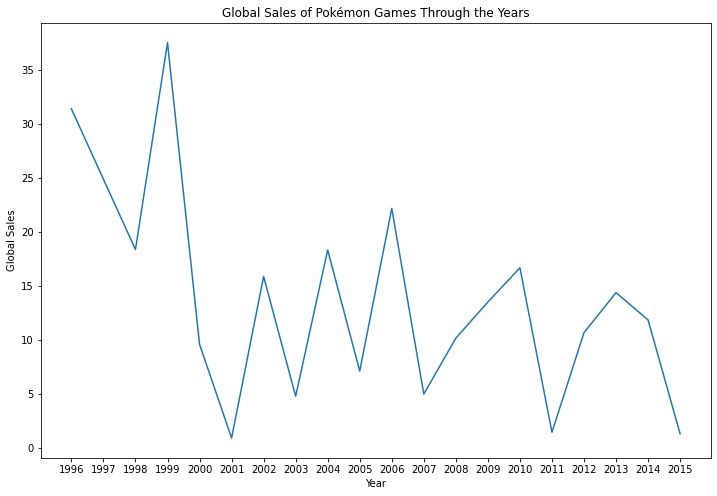

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(pokemon_sy["Year"], pokemon_sy["Global_Sales"])  
plt.xticks(range(1996,2016))
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.title("Global Sales of Pokémon Games Through the Years")

plt.show()

In [8]:
pokemon_gg = pokemon.groupby(["Platform"],as_index=False)[["Name"]].count()
pokemon_gg = pokemon_gg.sort_values(by="Name",ascending=True)
pokemon_gg.head()

,Platform,Name
6,Wii,1
4,GC,4
5,N64,4
0,3DS,7
2,GB,7


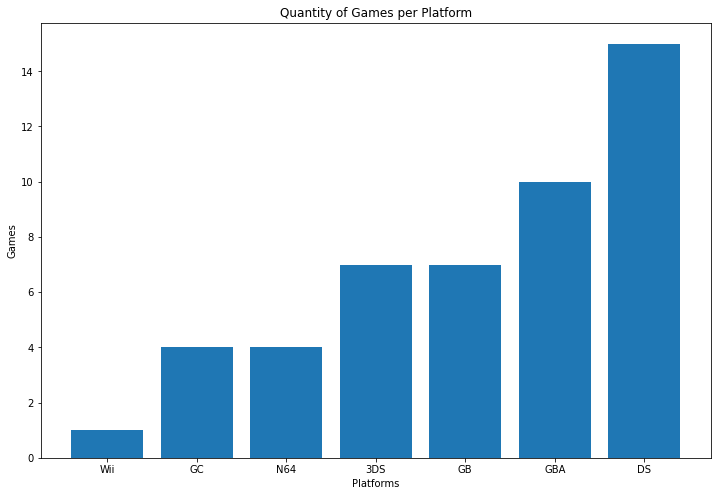

In [9]:
plt.figure(figsize=(12, 8))
#fig.add_axes([0,0,1,1])
plt.bar(pokemon_gg["Platform"],pokemon_gg["Name"])
plt.xlabel("Platforms")
plt.ylabel("Games")
plt.title("Quantity of Games per Platform")
plt.show()